# import data

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir

In [2]:
bID = 's_b1555_22'
SAVE_PATH = PROCESSED_DIR / bID / 'final_stimuli_set.pickle'

In [3]:
import pandas as pd

In [4]:
data = pd.read_pickle(SAVE_PATH)

In [23]:
crop = data[['pair_index', 'type', 'mean_SDoTMF']]

In [6]:
import numpy as np

In [7]:
segments = np.unique(data['shuffle_og_seg'])

In [8]:
from starling_rhythm.synth import synth_song

In [14]:
addresses = []
for segment in segments:
    name = segment.split('_')[:-1]
    name = '_'.join([str(elem) for i, elem in enumerate(name)])
    name = name + '_templatingFalse-empirical_0_.wav'
    address = PROCESSED_DIR / bID /'templatingFalse-empirical' / name
    addresses.append(address)

In [15]:
addresses

[PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/templatingFalse-empirical/s_b1555_22_2022-09-20_10-00-01-02_1463625_1517595_seg_35.0_45.0_templatingFalse-empirical_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/templatingFalse-empirical/s_b1555_22_2022-09-20_11-00-01-02_502435_545690_seg_25.0_35.0_templatingFalse-empirical_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/templatingFalse-empirical/s_b1555_22_2022-09-21_09-00-01-02_1256705_1285315_seg_10.0_20.0_templatingFalse-empirical_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/templatingFalse-empirical/s_b1555_22_2022-09-21_18-00-01-02_1414605_1454470_seg_15.0_25.0_templatingFalse-empirical_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/templatingFalse-empirical/s_b1555_22_2022-09-21_19-00-01-01_1721695_1757290_seg_10.0_20.0_templatingFalse-empirical_0_.wav'),
 PosixPath('/mnt/cube/j8xing/starling

In [16]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

In [17]:
from starling_rhythm.mfdfa import tmf
n_jobs = 42
verbose = 0

In [18]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    real_ts = parallel(
        delayed(tmf)(
            address,
            ns = 32,
            amp_env_sr = 200,
            hilbert_artifacts = True
        )
        for address in tqdm(addresses, desc = 'getting all the real ones')
    )

getting all the real ones: 100%|██████████| 64/64 [00:00<00:00, 108.33it/s]


In [19]:
pair_index = np.arange(0, 64)
typee = np.full(64, fill_value = 'empirical')

In [20]:
temp = pd.DataFrame(
    {
        'pair_index': pair_index,
        'type': typee,
        'mean_SDoTMF': real_ts
    }
)

In [26]:
fin = pd.concat([temp, crop])

In [27]:
fin

,pair_index,type,mean_SDoTMF
0,0,empirical,57.070661
1,1,empirical,45.037951
2,2,empirical,51.796020
3,3,empirical,46.594464
4,4,empirical,44.692804
...,...,...,...
20,61,min,33.769136
5,62,max,40.058226
11,62,min,13.291902
0,63,max,61.740009


In [25]:
import seaborn as sns

<AxesSubplot:xlabel='mean_SDoTMF', ylabel='Count'>

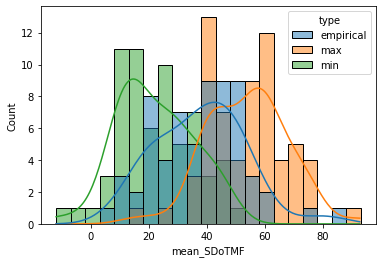

In [32]:
sns.histplot(data = fin.reset_index(), x = 'mean_SDoTMF', hue = 'type', binwidth = 5, kde = True)